In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
qutip.settings.has_mkl=False # This might fix the OS erros
qutip.settings.num_cpus=12

In [2]:
from utils import *
from sync_calcs import *
from sync_plots import *

In [3]:
J = 1 # Spin
N = int(2*J + 1) # Number of levels

In [4]:
n = 50 # angle array size scale

theta = np.linspace(0, np.pi, n)
phi = np.linspace(-np.pi, np.pi, 2*n).reshape(-1,1) # 1D row vector -> 2D column vector

### Master Equation

In [5]:
def get_hamiltonian(detuning, signal_strength):
    return detuning * jmat(J, 'z') + signal_strength * jmat(J, 'y')

In [6]:
def get_dissipators(gain_amp, loss_amp):
    return gain_amp * lindblad_dissipator(jmat(J, '+') * jmat(J, 'z')) / 2, loss_amp * lindblad_dissipator(jmat(J, '-') * jmat(J, 'z')) / 2

$H=0$

In [7]:
H0 = get_hamiltonian(0, 0)
gain, loss = get_dissipators(20, 1)

sstate0 = steadystate(H0, [gain, loss])

(<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
 <matplotlib.collections.QuadMesh at 0x2d36b7486d0>)

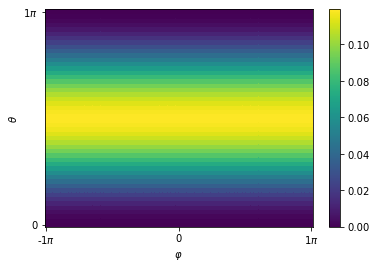

In [13]:
Q0 = my_spin_q_func(J, sstate0, phi, theta)
plot_spin_qfunc(Q0, theta, phi)

$H=\Delta S_z + \varepsilon S_y$

In [19]:
gain_amp = 1
loss_amp = 10

m = min(gain_amp, loss_amp)

detuning = 0
signal_strength = 0.1 * m

H = get_hamiltonian(detuning, signal_strength)
gain, loss = get_dissipators(gain_amp, loss_amp)

sstate = steadystate(H, [gain, loss])

(<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
 <matplotlib.collections.QuadMesh at 0x2d3692c34c0>)

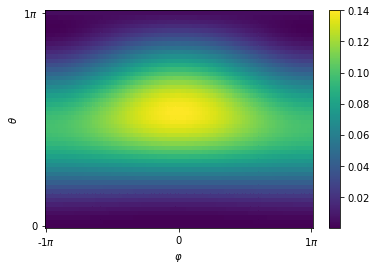

In [20]:
Q = my_spin_q_func(J, sstate, phi, theta)
plot_spin_qfunc(Q, theta, phi)

In [21]:
gain_amp = 1
loss_amp = 1

m = min(gain_amp, loss_amp)

detuning = 0
signal_strength = 0.1 * m

H = get_hamiltonian(detuning, signal_strength)
gain, loss = get_dissipators(gain_amp, loss_amp)

sstate = steadystate(H, [gain, loss])

(<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
 <matplotlib.collections.QuadMesh at 0x2d36d2a8670>)

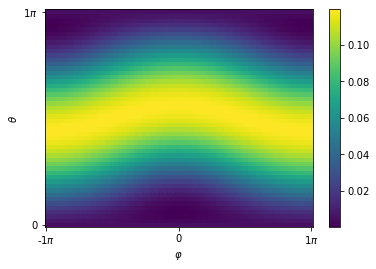

In [22]:
Q = my_spin_q_func(J, sstate, phi, theta)
plot_spin_qfunc(Q, theta, phi)

In [23]:
gain_amp = 10
loss_amp = 1

m = min(gain_amp, loss_amp)

detuning = 0
signal_strength = 0.1 * m

H = get_hamiltonian(detuning, signal_strength)
gain, loss = get_dissipators(gain_amp, loss_amp)

sstate = steadystate(H, [gain, loss])

(<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
 <matplotlib.collections.QuadMesh at 0x2d36e678070>)

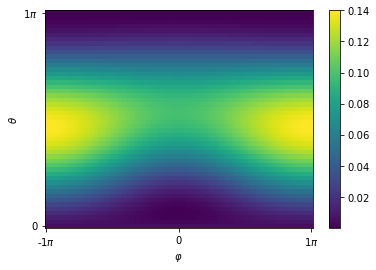

In [24]:
Q = my_spin_q_func(J, sstate, phi, theta)
plot_spin_qfunc(Q, theta, phi)